# 1. Descripción del problema

El problema a tratar en este informe es un problema de optimización llamado **el problema de la mochila**. Para entenderlo mejor hay que hacer de cuenta de que se es un ladrón, el cual tiene la libertad de robar una cierta cantidad de objetos que tienen un valor y peso asociados, sin embargo estos deben ser guardados en una mochila, la cual soporta un peso máximo total dentro de ella. Así, el problema se reduce a maximizar la ganancia que se puede conseguir con una combinación de objetos $n_{i'}$ de valores $v_{i'}$ y pesos $p_{i'}$ que deben ir dentro de una mochila de peso máximo $P$.

**Entrada:** lista de objetos de tamaño $n$ en la cual cada elemento $i$ tiene asociado un valor $v_i$ y un peso $p_i$.

**Salida**: Valor máximo posible de ganancia obtenida $G$.

**Tamaño del problema:** El tamaño para este problema viende definido por la cantidad de objetos que se pueden elegir, debido a que mientras más objetos, mayor cantidad de combinaciones posibles y por ende más grande el problema.

<a href="https://imgur.com/pp79bkt"><img src="https://i.imgur.com/pp79bkt.jpg" title="source: imgur.com" /></a>

A lo largo de este informe, se revisarán dos opciones de algoritmo para llegar a la solución final esperada. En primer lugar una opción mediante un algoritmo de **programación dinámica bottom-up**, y en segundo, un algoritmo de programación dinámica también pero que utiliza la variante de **elección greedy**.

# 2. Algoritmos


## 2.1 Opción bottom-up

### 2.1.1 Descripción

Esta opción, de manera parecida a otros algoritmos que se han revisado, utiliza la programación dinámica **bottom-up** para resolver el problema, es decir que resuelve los sub-problemas de menor tamaño de manera óptima, y a raíz de sus resultados va armando una solución final también óptima.

El algoritmo finalmente lo que debe hacer es ir probando las combinaciones de objetos y elegir la mejor, es por esto que debe tomar en cada iteración de este la decisión de ingresar o no un objeto a la mochila dependiendo de su peso y valor.

Es así como la **subestructura óptima** de este problema es la siguiente:

<a href="https://imgur.com/OjTUBHd"><img src="https://i.imgur.com/OjTUBHd.jpg" title="source: imgur.com" /></a>

La función de recurrencia que utiliza el algoritmo es de la siguiente manera:

\begin{equation}
V(i,p) = \begin{cases}
  0  & \text{si } n = 0 \text { ó } P = 0\\
  V(i-1,p) & \text {si } p_i > P \\
  max(V(i-1,p), v_i + V(i-1, P-p_i)) & \text{si } p_i \leq P
\end{cases}
\end{equation}

Esto quiere decir que el algoritmo tiene tres tipos de comportamiento según su entrada. Por un lado, si se tienen 0 objetos a elegir, o el peso máximo de la mochila es $0$ se retornará el valor $0$, este sería nuestro caso base.

También que en caso de querer insertar un objeto  de peso mayor a $P$ (peso máximo soportado por la mochila), se retornará el valor máximo conseguido en la iteración anterior, la cual no considera el objeto que se quiere ingresar.

Finalmente, en caso de que el peso del objeto sí pueda ser soportado por la mochila, se debe elegir el máximo valor entre:

1. El valor máximo encontrado hasta ahora, sin contar el valor ni peso del objeto $i$.

2. La suma del valor del objeto más el máximo valor posible a conseguir con el peso restante que puede soportar la mochila.

Este algoritmo consigue este funcionamiento mediante la creación de una matriz auxiliar `M[][]` las columnas de esta matriz representarán todos los pesos desde $0$ hasta $P$, mientras que en las filas se encontrarán los pesos respectivos de cada objeto.

Es así como en cada posición `M[i][j]` se guardará el máximo valor posible para un peso $j$, habiendo considerado todos los objetos seleccionables desde $0$ hasta $i$.

Finalmente la tabla se irá llenando por filas, decidiendo si agregar o no el objeto $i$ en la columna $j$, sumándolo así con el valor calculado en la fila anterior en esa columna o no.

Se retornará en última instancia el elemento en la posición `M[n][P]`, el cual será el último elemento añadido a la tabla, y corresponde al máximo valor para un tamaño $P$ habiendo considerado todas las opciones que consideren agregar o no a los $n$ elementos seleccionables.

### 2.1.2 Código

In [3]:
def knapSack(pesoMax, pesos, valores, n, verbose = False):
	K = [[0 for x in range(pesoMax + 1)] for x in range(n + 1)]   #Matriz auxiliar
																																	#Filas: objetos/pesos seleccionables Columnas: pesos posible
	pesoTot = 0
	subProblemas = 0

	for i in range(n + 1):  #Se recorre cada fila
		if verbose == True and i != 0:
			print("\033[31m" + "Calculando opciones para el objeto " + str(i) + ": " + "\033[0m")

		for j in range(pesoMax + 1): #Se recorre cada columna
			if i == 0 or j == 0:
				K[i][j] = 0 #Se coloca un 0 en caso de que alguno de los dos pesos sea nulo

			elif pesos[i-1] <= j:  #Si el objeto es soportado por la mochila, se calcula el máximo de los valores posibles
				if verbose == True and pesos[i-1] == j:
					print("Peso máximo soportado: " + "\033[31m" + str(j) + "\033[0m")
					print("Valor máximo calculado anteriormente: " + "\033[34m" + str(K[i-1][j]) + "\033[0m")
					print("Valor máximo conseguido agregando el objeto " + str(i) + "(" + str(j) + ")" + ": \033[33m" + str(valores[i-1] + K[i-1][j-pesos[i-1]]) + "\033[0m")
		 
				K[i][j] = max(valores[i-1] + K[i-1][j-pesos[i-1]], K[i-1][j])
				subProblemas += 1
		
				if K[i][j] == valores[i-1] + K[i-1][j-pesos[i-1]] and pesos[i-1] == j:
					pesoTot = pesos[i-1] + pesoMax - pesos[i-1]

				if verbose == True and pesos[i-1] == j:
					print("Valor máximo a guardar: " + "\033[35m" + str(K[i][j]) + "\033[0m");

			else:
				K[i][j] = K[i-1][j]  #Se retorna el valor conseguido en la iteración anterior en caso de que el objeto no pueda entrar en la mochila
 
	if verbose == True:
		print("Se retorna finalmente valor máximo: " + "\033[92m" + str(K[n][pesoMax]) + "\033[0m con peso: \033[92m" + str(pesoTot) + " \033[0m")
	return K[n][pesoMax], subProblemas   #Se retorna el último elemento de la tabla, el cual corresponde al máximo valor posible 
 
valores = [60, 100, 120]
pesos = [10, 20, 30]
pesoMax = 50
n = len(valores)
valMax, sub = knapSack(pesoMax, pesos, valores, n)
print("El valor máximo posible para", pesoMax, "es:", valMax)

El valor máximo posible para 50 es: 220


Las variables relevantes son:

* `valores`, lista de valores de cada objeto.
* `pesos`, lista de pesos de cada objeto.
* `pesoMax`, máximo peso soportado por la mochila.
* `n` largo de la lista de objetos.
* `i` y `j`, variables que servirán para recorrer la matriz e ir guardando valores.

### 2.1.3 Ejemplo

Para el ejemplo utilizado en el código anteriormente mencionado, se entrega a la función una lista de valores `[60, 100, 120]`, compuesta por $3$ valores, sumado a esto, se entrega una lista de pesos de cada objeto `[10, 20, 30]`. Cabe recalcar que cada valor `valores[i]` de la lista, está relacionado con cada peso `pesos[i]` de la segunda lista. Finalmente se entrega el peso máximo soportado por la mochila el cual es `pesoMax = 50`.

Así, el algoritmo nos retorna que el valor máximo posible que se puede conseguir como beneficio es de $220$. Se puede también deducir que los objetos que se encontrarán dentro de la mochila son el objeto $2$ y $3$.

<a href="https://imgur.com/CY3WQ0F"><img src="https://i.imgur.com/CY3WQ0F.jpg" title="source: imgur.com" /></a>

Adicionalmente, se muestra a continuación una imagen adaptada de cómo queda dispuesta la matriz K con los valores máximos a conseguir con un determinado peso:

<a href="https://imgur.com/poqs4NE"><img src="https://i.imgur.com/poqs4NE.jpg" title="source: imgur.com" /></a>

En la imagen se puede observar el comportamiento del llenado de la matriz, es así como cuando por ejemplo, si se analiza la fila $1$, se ve cómo para el peso $10$ en adelante, el máximo valor que se puede conseguir es $60$, esto es porque solo podemos considerar añadir el objeto $1$, o en caso contrario no agregar ningún objeto.

Finalmente se observa en la fila 3 cómo el algoritmo decide la mejor de las opciones según el peso máximo dado, es así como para un peso máximo de $30$, no selecciona al objeto $3$, sino que elije la combinación de los objetos $1$ y $2$, cuyo peso es el mismo, pero tienen en conjunto un valor de $160$.

### 2.1.4 Ejecución del código con opción verbose

In [7]:
valores = [60, 100, 120]
pesos = [10, 20, 30]
pesoMax = 50
n = len(valores)
print(knapSack(pesoMax, pesos, valores, n, True))

Calculando opciones para el objeto 1: 
Peso máximo soportado: 10
Valor máximo calculado anteriormente: 0
Valor máximo conseguido agregando el objeto 1(10): 60
Valor máximo a guardar: 60
Calculando opciones para el objeto 2: 
Peso máximo soportado: 20
Valor máximo calculado anteriormente: 60
Valor máximo conseguido agregando el objeto 2(20): 100
Valor máximo a guardar: 100
Calculando opciones para el objeto 3: 
Peso máximo soportado: 30
Valor máximo calculado anteriormente: 160
Valor máximo conseguido agregando el objeto 3(30): 120
Valor máximo a guardar: 160
Se retorna finalmente valor máximo: 220 con peso: 50 
220


Para la ejecución del verbose, se imprime por pantalla el mayor valor encontrado considerando todas las combinaciones posibles hasta el objeto. Es así como se observa cómo se compara el valor considerando o no el objeto y se guarda el mayor entre estos dos. 

Finalmente en verde se resalta el valor máximo encontrado, junto con el peso total de la combinación, esto es para que se pueda tener ciertas luces con respecto a qué objetos son los que componen el valor máximo encontrado.

## 2.2 Opción algoritmo greedy



### 2.2.1 Descripción



Para esta opción, se aplicará el paradigma de **algoritmos greedy**, esta forma de diseñar algoritmos sigue los principios de la programación dinámica, en el sentido de que particiona el problema original en sub-problemas que se pueden resolver individualmente para llegar a la solución final, sin embargo este tipo de algoritmos no calculan necesariamente todas las opciones/sub-problemas, sino que elijen con un cierto criterio un sub-problema a resolver, para así terminar resolviendo el resto del problema.

Los algoritmos greedy constan de dos elementos principales:

1. Una elección greedy

2. Una subestructura óptima

Se espera que combinando estos dos elementos, se llegue a una solución óptima, pero es importante recalcar que los algoritmos greedy **no aseguran** que la solución a la que se llegue sea la más óptima para el problema en cuestión.

Para este problema en particular, la estrategia para realizar la elección greedy es basar la elección de cada objeto en su beneficio de valor por unidad de peso, es decir $v_i \above 1 pt p_i$.

De esta manera, el algoritmo calculará estos valores para cada objeto, y los insertará de manera ordenada **descendente** en un arreglo auxiliar. A continuación de esto, se asumirá que el primer objeto de este arreglo será el que dará un mayor beneficio, por lo cual se agregará a la mochila en primer lugar. 

De quedar aún espacio suficiente para insertar otro objeto en la mochila, se procederá a insertar el siguiente elemento del arreglo, y así sucesivamente hasta que no quede peso suficiente para que otro objeto entre a la mochila.

### 2.2.2 Código

In [4]:
import operator

def knapSackDin (pesoMax, pesos, valores, n, verbose = False):
  ratio = {}
  iter = 0

  for i in range (n):
    iter += 1
    r = valores[i]/pesos[i]
    ratio[i] = r

  ratio = sorted(ratio.items(), key = operator.itemgetter(1), reverse = True)

  if verbose == True:
    pesoAux = pesoMax
    for key in enumerate(ratio):
      print("Objeto: \033[34m" + str(key[1][0]) +  "\033[0m tiene un valor por unidad de peso de: \033[33m" + str(key[1][1]) + "\033[0m")
  maxValor = 0

  for key in enumerate(ratio):
    iter += 1

    if pesos[key[1][0]] <= pesoMax:

      if verbose == True:
        print("Se agrega el objeto: \033[34m" + str(key[1][0]) + "\033[0m con valor: \033[35m" + str(valores[key[1][0]]) + "\033[0m y peso: \033[31m" + str(pesos[key[1][0]]) + "\033[0m")
        print("Peso restante: \033[32m" + str(pesoMax) + "\033[0m")

      maxValor += valores[key[1][0]]
      pesoMax -= pesos[key[1][0]]

  if verbose == True:
    print("Se retorna finalmente valor máximo: " + "\033[92m" + str(maxValor) + "\033[0m con peso: \033[92m" + str(pesoAux - pesoMax) + " \033[0m")

  return maxValor, iter

valores = [60, 100, 120]
pesos = [10, 20, 30]
pesoMax = 50
n = len(valores)
valMax, sub = knapSackDin(pesoMax, pesos, valores, n)
print("El valor máximo posible para", pesoMax, "es:", valMax)

El valor máximo posible para 50 es: 160


Las variables relevantes son:

* `ratio`: Que es el arreglo donde se guardan los valores de valor/peso obtenidos para cada objeto.
* `maxValor`: Almacena el máximo valor encontrado.
* `key`: Es importante recalcar que para esta opción se utiliza un diccionario, en el cual cada ratio encontrado se asocia al índice del objeto en cuestión, de esta manera esta variable se encarga de acceder a la clave de nuestro diccionario, y en base a eso recorrer las listas de valores y pesos de los objetos.

### 2.2.3 Ejemplo

El ejemplo utilizado es el mismo mostrado anteriormente:

<a href="https://imgur.com/YAAeHoH"><img src="https://i.imgur.com/YAAeHoH.jpg" title="source: imgur.com" /></a>

### 2.2.4 Ejecución con opción verbose

In [54]:
valores = [60, 100, 120]
pesos = [10, 20, 30]
pesoMax = 50
n = len(valores)
print(knapSackDin(pesoMax, pesos, valores, n, True))

Objeto: 0 tiene un valor por unidad de peso de: 6.0
Objeto: 1 tiene un valor por unidad de peso de: 5.0
Objeto: 2 tiene un valor por unidad de peso de: 4.0
Se agrega el objeto: 0 con valor: 60 y peso: 10
Peso restante: 50
Se agrega el objeto: 1 con valor: 100 y peso: 20
Peso restante: 40
Se retorna finalmente valor máximo: 160 con peso: 30 
160


Para este verbose, se presenta inicialmente el valor/peso de cada objeto de la lista, para tener la idea de cómo es que quedarán ordenados los objetos en base a este valor calculado. Posteriormente, se imprime por pantalla el orden en el cual son ingresados los objetos, para finalmente retornar el máximo valor obtenido por este algoritmo junto con su peso asociado.

# 3. Propidades del algoritmo

## 3.1 Correctitud

### 3.1.1 Teorema de correctitud del algoritmo Bottom-up

El algoritmo para resolver el problema de la mochila, dadas dos listas $[v_1,v_2, \ldots ,v_i]$ y $[p_1,p_2, \ldots ,p_i]$, donde $i$ representa un objeto, $v_i$ y $p_i$ representan un valor y un peso asociado al objeto $i$ respectivamente, además de un valor de peso máximo $P$. El algoritmo retorna el mayor valor posible a obtener para una combinación de objetos $i$ con peso $p_i$ y valor $v_i$ considerando que ninguna combinación puede sobrepasar al límite $P$.

**Hipótesis**

En cada iteración el algoritmo para resolver el problema de la mochila, retorna el máximo valor posible para un peso máximo determinado para esa iteración, esto quiere decir que en la última iteración, el valor máximo retornado, será el máximo valor posible para el peso máximo que se entrega al comienzo del problema.

**Prueba del teorema**

Para la comprobación de la correctitud del algortimo se utilizará el método de inducción, el cual ya ha sido explicado en informes anteriores.

**Caso base**

Cuando el peso máximo entregado al comienzo del problema es $0$, o por contraparte se tienen $0$ elementos para seleccionar, se observa que el algoritmo retorna el valor $0$, el cual es trivialmente el único y máximo valor posible a alcanzar.

**Paso inductivo**

Para tamaños más grandes, el algoritmo verifica inicialmente que el peso del objeto a agregar sea soportado por la mochila, en caso de ser así, se procede a comparar si el valor del objeto que se va a agregar, sumado con el máximo beneficio que se puede conseguir con el espacio restante de la mochila es mayor que el máximo beneficio conseguido con la iteración anterior para el mismo peso en cuestión (esto gracias al funcionamiento de la matriz auxiliar, explicado anteriormente), de ser verdadera esta sentencia, el valor máximo se actualizará al valor del objeto más el máximo beneficio restante, en caso contrario, el algoritmo elegirá el valor anteriormente calculado.

De esta manera, para el paso final, se comparará el máximo valor posible agregando o no el objeto con mayor peso seleccionable, y de esta manera, se retornará el mayor valor para el peso más cercano al límite de peso de la mochila.

### 3.1.2 Incorrectitud del algoritmo greedy

La principal duda que surge a continuación es por qué entonces, si el algoritmo greedy comparte características con el algoritmo bottom-up, además de realizar una elección que parece ser óptima, por qué no se asegura que la solución final a la cual se llega con el algoritmo greedy sea también la solución óptima para el problema original.

Esto se explica debido a las características que componen un algoritmo greedy, y es que se tienen los siguientes elementos:

1. Se tiene la elección greedy +  un subproblema con las mismas características del problema original. En nuestro problema, la elección greedy es elegir el elemento con mayor ratio, y el siguiente subproblema se reduce a lo mismo, elegir el siguiente elemento dentro de nuestro arreglo con el mejor ratio, hasta que se alcance el peso máximo soportado.

2. Resolver el problema original es equivalente a resolver todos los subproblemas con la misma estrategia. Esto también es cierto debido a que cuando se llegue al peso máximo posible, quiere decir que se han elegido todos los elementos con mejor ratio posibles, lo cual significaría que se ha llegado al máximo valor posible a conseguir dentro del peso máximo entregado.

3. Es con este paso final con el cual no se puede asegurar que el algoritmo realiza una elección óptima, debido a que no necesariamente el elemento con mejor ratio o mayor valor deba estar presente dentro de la mochila.

Es ahí donde el algoritmo greedy no cumple con la condición de ser óptimo, y es que estos algoritmos basan su correctitud en el tipo de elección que realizan, por lo cual si esta es óptima, el algoritmo también lo será, y viceversa como ocurre en este caso.

Se púede observar fácilmente esta característica observando el ejemplo presentado en este informe, y es que en la opción de algoritmo greedy, se agregan los objetos $1$ y $2$ que son los que tienen una mejor relación valor/peso, sin embargo, debido a que estos dos objetos se agregan en un inicio, para el objeto $3$ la mochila se encuentra sin espacio, por lo cual es imposible considerar la opción de que este sea incluido o combinado con algún otro objeto de la mochila, lo cual descarta la opción óptima la cual se sabe gracias al algoritmo Bottom-up que es guardar el objeto $2$ y $3$, combinación que dará un valor total de $220$.

## 3.2 Tiempos de ejecución

### 3.2.1 Tiempo de ejecución de algoritmo Bottom-up

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este en el código.

Como se describió anteriormente, el algoritmo utiliza dos ciclos `for`, el primero que recorre la lista de objetos seleccionables de tamaño $n$. Mientras que el segundo ciclo `for` que se encuentra anidado, se recorren todos los pesos posibles desde $0$ hasta $P$, siendo este último el peso máximo soportado por la mochila.

Es así como la complejidad temporal de este algoritmo es de orden $O(n*m)$.

### 3.2.2 Tiempo de ejecución del algoritmo greedy


El algoritmo greedy por su parte realiza dos operaciones fundamentales que requieren un tiempo para ser realizados.

En primer lugar se tiene el ordenamiento de los objetos con respecto a su ratio, esto, dependiendo del algoritmo de ordenamiento que se utilice tendrá un tiempo determinado de ejecución, pero para efectos de este informe, se elegirá el algoritmo de ordenamiento estándar con complejidad temporal de $O(n*log(n))$.

A lo anterior se le agrega el tiempo que toma recorrer el arreglo para llegar a la solución, el cual viene denotado por el segundo ciclo `for`, el cual adiciona una complejidad de $O(n)$.

Finalmente el algoritmo greedy tiene una complejidad temporal de $O(n*log(n))$.

# 4. Experimentos

## 4.1 Comparación entre alternativas

En el siguiente experimento se ilustrará cómo se comportan los tiempos de ejecución de cada alternativa del algoritmo (recursiva/bottom-up), a medida que el tamaño del problema crece.

### Tiempo de ejecución de Bottom-up

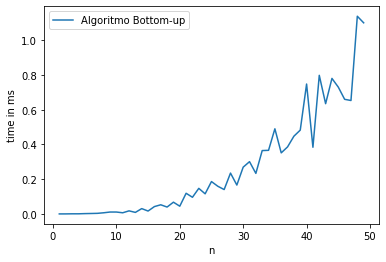

In [5]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x = []; y1 = []

for n in range(1,50):

  W, valores, pesos = knapsack_instance_generator(n)

  t = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({W}, {pesos}, {valores}, {len(valores)})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Tiempo de ejecución de algoritmo greedy

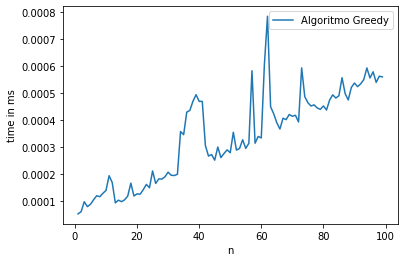

In [6]:
x = []; y1 = []

for n in range(1,100):

  W, valores, pesos = knapsack_instance_generator(n)

  k = repeat(setup="from __main__ import knapSackDin", stmt=f"knapSackDin({W}, {pesos}, {valores}, {len(valores)})", repeat=1, number=10)

  x.append(n)
  y1.append(k)


plt.plot(x,y1)
plt.legend(["Algoritmo Greedy"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Conclusiones

Luego de analizar ambos gráficos, se pueden observar ambos crecimientos de tiempo en relación al tamaño del problema. Por un lado se observa que la tendencia de la primera gráfica es de cierta forma cuadrática, tal como se mencionaba en el punto de la complejidad temporal. Mientras que el algoritmo greedy presenta una cierta forma casi lineal también cercano a la complejidad temporal mencionada anteriormente.

Todo esto a pesar de ciertos picos de rendimiento por características de procesador, estas han estado presentes en todas las pruebas.

## 4.2 Comparación entre cantidad de sub-problemas/iteraciones

Se compararán ya no el tiempo medido por computadora sino el contador de subproblemas a resolver presente en la implementación del algoritmo recursivo, con respecto a la cantidad de iteraciones que se deben resolver para el algoritmo bottom-up, mencionada anteriormente en la descripción del algoritmo.

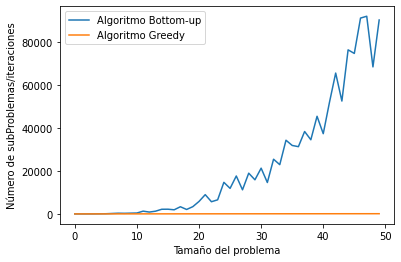

In [7]:
import matplotlib.pyplot as plt
import math

y = []; y1 = []; x = []

for n in range(0,50):
  pesoMax, valores, pesos = knapsack_instance_generator(n)
  cont1 = cont2 = 0

  aux, cont1 = knapSack(pesoMax, pesos, valores, len(valores))
  aux, cont2 = knapSackDin(pesoMax, pesos, valores, len(valores))
  
  x.append(n)
  y.append(cont1)
  y1.append(cont2)

plt.plot(x,y)
plt.plot(x,y1)

plt.legend(["Algoritmo Bottom-up", "Algoritmo Greedy"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de subProblemas/iteraciones')
plt.show()

### Conclusiones

En este último gráfico se puede observar con mayor claridad como la proporción del tamaño del problema sobre el tiempo es casi lineal para el algoritmo Greedy, mientras que para el algoritmo recursivo es una relación exponencial a partir de un tamaño $20$.

## 4.3 Comparación de valores alcanzados

Para este último experimento se graficará cómo se diferencian los valores máximos obtenidos dependiendo del algoritmo que se utilice para un tamaño de problema en particular, se generarán varias instancias con tamaños de problema distintos, y se utilizará un gráfico de cajas y bigotes para mostrar los resultados.

### Problema tamaño 5

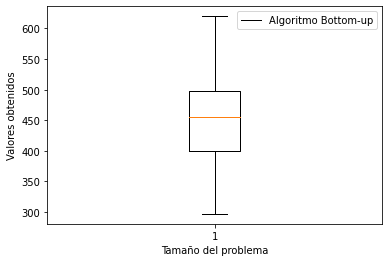

In [30]:
y = []; y1 = []; x = []

for i in range(0,10):
  pesoMax, valores, pesos = knapsack_instance_generator(5)
  cont1 = cont2 = 0

  aux1, cont1 = knapSack(pesoMax, pesos, valores, len(valores))
  aux2, cont2 = knapSackDin(pesoMax, pesos, valores, len(valores))
  
  x.append(i)
  y.append(aux1)
  y1.append(aux2)

plt.boxplot(y)

plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Valores obtenidos')
plt.show()

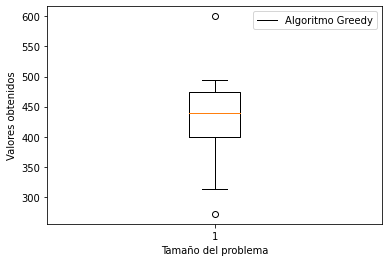

In [31]:
plt.boxplot(y1)

plt.legend(["Algoritmo Greedy"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Valores obtenidos')
plt.show()

### Problema tamaño 10

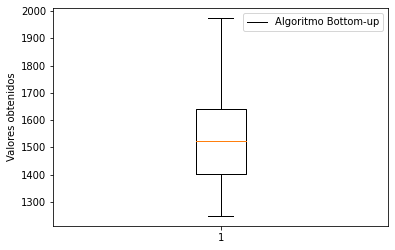

In [32]:
y = []; y1 = []; x = []

for i in range(0,10):
  pesoMax, valores, pesos = knapsack_instance_generator(10)
  cont1 = cont2 = 0

  aux1, cont1 = knapSack(pesoMax, pesos, valores, len(valores))
  aux2, cont2 = knapSackDin(pesoMax, pesos, valores, len(valores))
  
  x.append(i)
  y.append(aux1)
  y1.append(aux2)

plt.boxplot(y)

plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('')
plt.ylabel('Valores obtenidos')
plt.show()

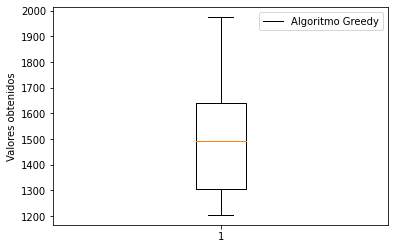

In [33]:
plt.boxplot(y1)

plt.legend(["Algoritmo Greedy"])

plt.xlabel('')
plt.ylabel('Valores obtenidos')
plt.show()

### Problema tamaño 20

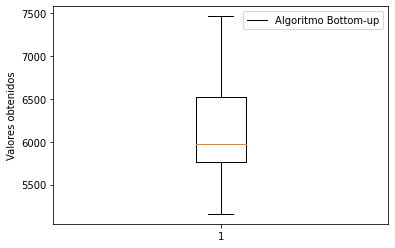

In [34]:
y = []; y1 = []; x = []

for i in range(0,10):
  pesoMax, valores, pesos = knapsack_instance_generator(20)
  cont1 = cont2 = 0

  aux1, cont1 = knapSack(pesoMax, pesos, valores, len(valores))
  aux2, cont2 = knapSackDin(pesoMax, pesos, valores, len(valores))
  
  x.append(i)
  y.append(aux1)
  y1.append(aux2)

plt.boxplot(y)

plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('')
plt.ylabel('Valores obtenidos')
plt.show()

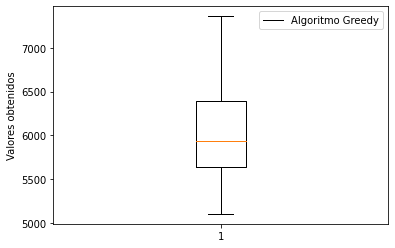

In [35]:
plt.boxplot(y1)

plt.legend(["Algoritmo Greedy"])

plt.xlabel('')
plt.ylabel('Valores obtenidos')
plt.show()

### Conclusiones

A lo largo del experimento se puede observar que para el algoritmo greedy, los resultados obtenidos suelen estar siempre con una ligera mayor dispersión entre los valores, mientras que para el algoritmo Bottom-up los valores se encuentran más condensados.

Esto se puede deber a que el algoritmo Bottom-up, asegura siempre un mismo tipo de comportamiento, debido a que siempre se va a basar en sus respuestas anteriores para definir una solución final. Por otro lado el algoritmo greedy tiene un comportamiento mucho más variable, debido a que la efectividad del criterio de la elección greedy dependerá también del contexto del problema y sus valores.

Finalmente se puede destacar que a medida que el tamaño del problema crece, el rendimiento del algoritmo greedy en términos de precisión crece, debido a que se observan gráficos más similares el uno al otro entre ambas opciones de algoritmo. Por lo que se podría concluir que el algoritmo greedy en tamaños grandes de problema, puede llegar a rendir de una manera cercana a la óptima esperada.